In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets        import load_iris, load_breast_cancer
#데이터 분류 함수
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
#분류 알고리즘
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression, LinearRegression
from sklearn.impute          import SimpleImputer
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import seaborn as sns
from io import StringIO
import missingno as msno
import matplotlib.pyplot as plt

#군집
from sklearn.cluster import KMeans

### 군집화 (cluster)
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것을 의미함
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 하는 알고리즘
- 기본적으로 비지도 학습이며 정답(타겟)이 없다
- 피처가 많아지거나, 이상치의 데이터가 존재하면 성능이 떨어질 수 있다.

In [4]:
cluster_frm = pd.DataFrame(columns=('x', 'y'))
cluster_frm.loc[0] = [6,78]
cluster_frm.loc[1] = [7,1]
cluster_frm.loc[2] = [2,1]
cluster_frm.loc[3] = [4,2]
cluster_frm.loc[4] = [16,14]
cluster_frm.loc[5] = [4,8]
cluster_frm.loc[6] = [9,0]
cluster_frm.loc[7] = [15,8]
cluster_frm.loc[8] = [62,16]
cluster_frm.loc[9] = [27,36]
cluster_frm.loc[10] = [11,60]
cluster_frm.loc[11] = [33,5]
cluster_frm

,x,y
0,6,78
1,7,1
2,2,1
3,4,2
4,16,14
5,4,8
6,9,0
7,15,8
8,62,16
9,27,36


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


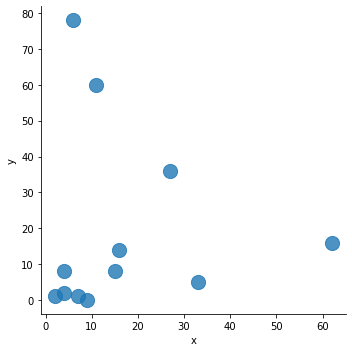

In [5]:
sns.lmplot( 'x', 'y',
            data=cluster_frm,
            fit_reg=False,
           scatter_kws={'s':200})
plt.show()
plt.close()

In [10]:
kmeans = KMeans(n_clusters = 3)  #클러스터 갯수 정해주기
kmeans.fit(cluster_frm) #군집 모델 학습
#군집은 predict 없음

KMeans(n_clusters=3)

In [13]:
print("타입 - ", type(kmeans))
print("클러스터 아이디 : ", kmeans.labels_)
print("클러스터 아이디 타입 - ", type(kmeans.labels_))

타입 -  <class 'sklearn.cluster._kmeans.KMeans'>
클러스터 아이디 :  [1 2 2 2 2 2 2 2 0 0 1 0]
클러스터 아이디 타입 -  <class 'numpy.ndarray'>


In [14]:
cluster_frm['cluster_id'] = kmeans.labels_
cluster_frm

,x,y,cluster_id
0,6,78,1
1,7,1,2
2,2,1,2
3,4,2,2
4,16,14,2
5,4,8,2
6,9,0,2
7,15,8,2
8,62,16,0
9,27,36,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


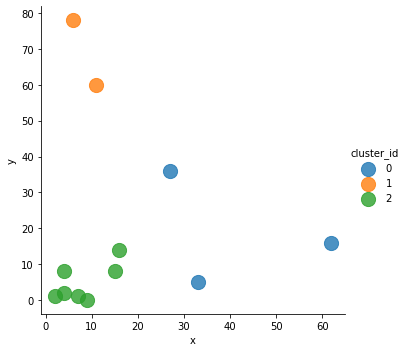

In [15]:
#클러스터 아이디를 통한 시각화
sns.lmplot( 'x', 'y',
            data=cluster_frm,
            fit_reg=False,
           scatter_kws={'s':200},
           hue='cluster_id')
plt.show()
plt.close()

In [19]:
from sklearn.datasets import make_blobs   #분류용 가상 데이터 생성

#n_samples:표본 수 / centers:클러스터 수 / 
X, y = make_blobs(n_samples   = 300,
                 n_features   = 2,
                 centers      = 3,
                 random_state = 100)

In [20]:
print(X)
print()
print(y)

[[-1.04844640e+01 -7.96790222e+00]
 [-3.39076283e+00  7.07786537e+00]
 [-1.03572951e+01 -8.70615998e+00]
 [-8.15044871e+00 -7.96418322e+00]
 [-9.03956370e+00 -6.77732260e+00]
 [-2.13452037e+00  6.78552725e+00]
 [ 6.78603005e-01 -4.17761085e+00]
 [-9.89275599e+00 -8.91712947e+00]
 [-1.22046374e-01  5.16013150e+00]
 [-1.08998240e+00 -4.56741361e+00]
 [ 1.21168542e+00  4.92265860e+00]
 [ 2.51469464e-01 -3.66942865e+00]
 [-2.05814047e+00  6.84288768e+00]
 [ 1.09049844e+00 -5.87582929e+00]
 [ 1.33439820e+00 -4.16262506e+00]
 [-8.07463680e-01  5.61161784e+00]
 [ 1.10594346e+00 -4.41906375e+00]
 [ 9.37238113e-02  7.90841888e+00]
 [ 9.76970826e-01 -4.40432866e+00]
 [-1.04164861e+01 -1.03206552e+01]
 [-9.88895050e+00 -8.20004984e+00]
 [ 5.41860777e-01 -4.37693628e+00]
 [ 1.54081964e+00 -4.53702344e+00]
 [ 1.39109664e+00 -4.44895770e+00]
 [-1.15070368e+01 -6.77759143e+00]
 [-1.42141825e+00  6.29276328e+00]
 [-1.39203973e+00  5.93735431e+00]
 [-9.45879663e+00 -7.42008560e+00]
 [-1.68854218e+00  8

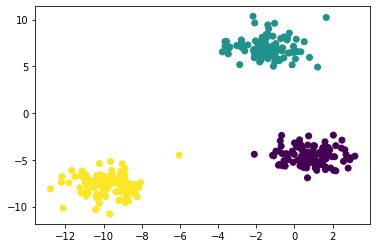

In [26]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

plt.show()
plt.close()

In [27]:
feature, label = make_blobs(random_state=100)

print(feature)
print()
print(label)

[[ 3.36818459e-01 -3.40287961e+00]
 [-9.48324266e+00 -8.66266052e+00]
 [-1.93336328e+00  5.70953908e+00]
 [-1.00318241e+01 -5.57834393e+00]
 [ 5.41860777e-01 -4.37693628e+00]
 [-8.12962929e+00 -7.05554321e+00]
 [-7.30825786e-01  7.32375552e+00]
 [-1.84142532e+00  6.20630467e+00]
 [ 4.10071850e-01 -3.99744881e+00]
 [-8.73509589e+00 -5.49090535e+00]
 [ 1.84941962e+00 -3.91839346e+00]
 [-9.15256069e+00 -9.17805648e+00]
 [-3.21429939e+00  5.75926164e+00]
 [ 2.84503785e-01 -3.61576523e+00]
 [-9.29074849e-01  5.79099955e+00]
 [ 3.66925242e-01  6.51861930e+00]
 [ 1.59909918e+00 -3.07105617e+00]
 [-9.71270568e+00 -7.91707651e+00]
 [-1.00804044e+01 -6.55135324e+00]
 [ 1.10594346e+00 -4.41906375e+00]
 [ 2.48708050e+00 -2.89100712e+00]
 [ 5.87148931e-03 -3.18314256e+00]
 [ 1.61854360e+00 -4.88855923e+00]
 [-9.15856722e+00 -7.13894115e+00]
 [-3.07633571e+00  7.80049677e+00]
 [ 1.11746530e-01 -3.61615829e+00]
 [-9.43932351e+00 -7.29863035e+00]
 [-1.69466230e+00  4.40837111e+00]
 [ 1.05261753e+00 -3

In [28]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(feature)

KMeans(n_clusters=3)

In [29]:
kmeans.labels_
#모델을 통해 나온 클러스터 아이디

array([1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1])

In [30]:
kmeans.predict(feature)

array([1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1])

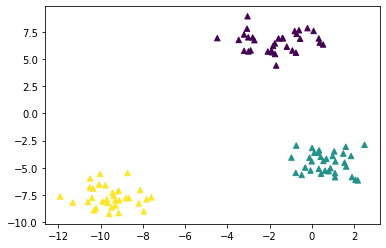

In [41]:
plt.scatter(feature[ : , 0], feature[ :, 1],
            marker='^',
            c = kmeans.labels_,
           s = 30)

In [79]:
kmeans.cluster_centers_

array([[-1.72134158,  6.61045437],
       [ 0.70353328, -4.52767455],
       [-9.52981151, -7.69781936]])

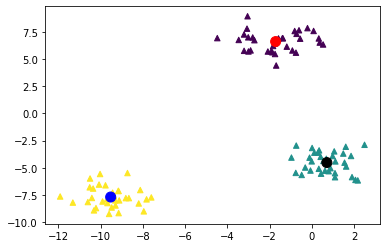

In [39]:
plt.scatter(feature[ : , 0], feature[ :, 1],
            marker='^',
            c = kmeans.labels_,
           s = 30)
plt.scatter(kmeans.cluster_centers_[ : , 0], kmeans.cluster_centers_[ :, 1],
            marker='o',
            c = ['r', 'k', 'b'],
           s = 100)

In [31]:
#군집의 중심을 가져옴
#군집의 위치와 거리에서 중심이 되는 점?
kmeans.cluster_centers_

array([[-1.72134158,  6.61045437],
       [ 0.70353328, -4.52767455],
       [-9.52981151, -7.69781936]])

In [137]:
iris = load_iris()
iris_frm = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [138]:
iris_kmeans = KMeans(n_clusters = 3,
                     verbose    = 1,
                     init       = 'k-means++',  #좀더 상향된 기능으로 센트로이드를 잡는다.
                     max_iter   = 300)          #300회 동안 센터 잡아라.
                     
iris_kmeans.fit(iris_frm)
#fit은 데이터 프레임으로, 피처밖에 없으므로

Initialization complete
Iteration 0, inertia 137.52999999999997
Iteration 1, inertia 81.41036187795004
Iteration 2, inertia 79.57585726935399
Iteration 3, inertia 78.99749895643232
Iteration 4, inertia 78.85566582597727
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 125.93999999999998
Iteration 1, inertia 79.35648012363988
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 126.18
Iteration 1, inertia 81.28059962393473
Iteration 2, inertia 79.19714263977781
Iteration 3, inertia 78.851441426146
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 154.75000000000003
Iteration 1, inertia 83.86535287780858
Iteration 2, inertia 79.86398439527464
Iteration 3, inertia 79.19714263977781
Iteration 4, inertia 78.851441426146
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 114.74999999999999
Iterati

KMeans(n_clusters=3, verbose=1)

In [139]:
iris_kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [144]:
iris_kmeans.labels_
#학습을 통해 나온 군집 아이디

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [145]:
#데이터 프레임에 그룹 아이디 추가
iris_frm['cid'] = iris_kmeans.labels_
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [146]:
iris_frm['target'] = iris.target
iris_frm
#군집 데이터와 기존 타겟 데이터가 다른것을 볼 수 있다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [147]:
#cid를 기준으로 sepal length의 빈도 확인
iris_frm.groupby(['cid', 'target'])['sepal length (cm)'].count()

cid  target
0    1         48
     2         14
1    0         50
2    1          2
     2         36
Name: sepal length (cm), dtype: int64

#### 주성분 분석(Principal Components Analysis)
- 학습 알고리즘은 피처가 많으면 신뢰도가 떨어지고 과적합 발생 위험 또한 증가함
- 고차원의 데이터를 저차원의 데이터로 차원을 축소하는 방법
- 이유: 모든 피처가 결과에 영향을 미치는것이 아니기 때문
- 시각화를 위해서는 2차원의 그래프여야 함
- 장점: 시각화, 노이즈 제거, 메모리 절약, 모델의 성능 개선

In [148]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2)

iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [149]:
iris_frm['pca_x'] = iris_pca_trans[ : , 0]
iris_frm['pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


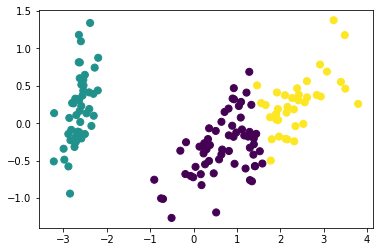

In [154]:
plt.scatter(iris_frm['pca_x'], iris_frm['pca_y'],
            marker='o',
            c = iris_kmeans.labels_,
           s = 50)

plt.show()
plt.close()

- 차원 축소 시 피처의 단위가 다를 경우 스케일링이 꼭 필요하다.

In [155]:
#스케일링 함수 선언
def feature_scaling(method='None', input_data = None):
    if method == 'standard':
        return StandardScaler().fit_transform(input_data)
    elif method == 'minmax':
        return MinMaxScaler().fit_transform(input_data)

In [156]:
# 스케일링
std_scaler = feature_scaling(method='standard', input_data=iris_frm.iloc[ : , :4])
std_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [158]:
#다시 주성분 분석
iris_pca = PCA(n_components = 2)

iris_pca_trans = iris_pca.fit_transform(std_scaler)
iris_pca_trans

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [97]:
iris_pca_centers = PCA(n_components = 2)

iris_pca_centers = iris_pca_centers.fit_transform(iris_kmeans.cluster_centers_)
iris_pca_centers

array([[ 4.81102432, -0.31519994],
       [-0.90906714,  0.91761849],
       [-3.90195719, -0.60241855]])

In [86]:
iris_pca_centers[:,2]

array([2.23476614e-16, 2.23476614e-16, 2.23476614e-16])

In [159]:
#스케일링 한 데이터 프레임에 추가
iris_frm['std_pca_x'] = iris_pca_trans[ : , 0]
iris_frm['std_pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y,std_pca_x,std_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1.870503,0.386966
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1.372788,1.011254


In [164]:
iris_kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [168]:
#센터 찍으려면 새로 클러스터 찍어야함 std_pca_x와 std_pca_y에 대해서
std_iris_kmeans = KMeans(n_clusters=3)
std_iris_kmeans.fit(iris_frm.iloc[ : , -2 : ])
iris_frm.iloc[ : , -2 : ]

,std_pca_x,std_pca_y
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [173]:
std_iris_kmeans.cluster_centers_

array([[ 1.72103664,  0.60288719],
       [-2.22475316,  0.28892745],
       [ 0.57262144, -0.80720888]])

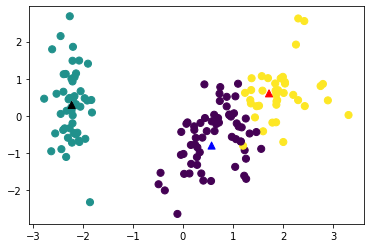

In [176]:
plt.scatter(iris_frm['std_pca_x'], iris_frm['std_pca_y'],
            c = iris_kmeans.labels_,
           s = 50)
plt.scatter(std_iris_kmeans.cluster_centers_[ : , 0], std_iris_kmeans.cluster_centers_[ :, 1],
            marker='^',
            c = ['r', 'k', 'b'],
           s = 50)

plt.show()
plt.close()

#### KMeans 실습
- 도매업 고객 데이터

In [188]:
customer_frm = pd.read_csv("data/Wholesale customers data.csv")
customer_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [189]:
customer_frm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [236]:
#주성분 분석 진행

customer_kmeans = KMeans(n_clusters = 3,
                         verbose    = 1,
                         init       = 'k-means++',  #좀더 상향된 기능으로 센트로이드를 잡는다.
                         max_iter   = 300)          #300회 동안 센터 잡아라.
                     
customer_kmeans.fit(customer_frm)

Initialization complete
Iteration 0, inertia 208033790192.75714
Iteration 1, inertia 153805190628.19214
Iteration 2, inertia 150222663944.3065
Iteration 3, inertia 147980224596.79498
Iteration 4, inertia 145472546083.08316
Iteration 5, inertia 144213094888.16205
Iteration 6, inertia 143124370782.68478
Iteration 7, inertia 142984360139.01047
Iteration 8, inertia 142781962416.4141
Iteration 9, inertia 142329519855.17355
Iteration 10, inertia 142021223027.92297
Iteration 11, inertia 141988117296.65057
Iteration 12, inertia 141982312498.33127
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 163924771728.98535
Iteration 1, inertia 145184176572.09335
Iteration 2, inertia 142673755502.26892
Iteration 3, inertia 141891864944.95303
Iteration 4, inertia 141511575585.07642
Iteration 5, inertia 141081647854.02133
Iteration 6, inertia 140602877433.4697
Iteration 7, inertia 140447939940.248
Iteration 8, inertia 140322807752.12357
Iteration 9, inertia 140050

KMeans(n_clusters=3, verbose=1)

In [237]:
customer_kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [194]:
customer_kmeans.cluster_centers_

array([[1.13333333e+00, 2.56666667e+00, 3.59414000e+04, 6.04445000e+03,
        6.28861667e+03, 6.71396667e+03, 1.03966667e+03, 3.04946667e+03],
       [1.96000000e+00, 2.44000000e+00, 8.00004000e+03, 1.85114200e+04,
        2.75739000e+04, 1.99668000e+03, 1.24073600e+04, 2.25202000e+03],
       [1.26060606e+00, 2.55454545e+00, 8.25346970e+03, 3.82460303e+03,
        5.28045455e+03, 2.57266061e+03, 1.77305758e+03, 1.13749697e+03]])

In [195]:
#원본 두고 클러스터 id 추가
customer_frm_ori = customer_frm.copy()
customer_frm['cid'] = customer_kmeans.labels_
customer_frm

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,2


In [196]:
#차원 축소 진행
customer_pca = PCA(n_components = 2)

customer_pca_trans = customer_pca.fit_transform(customer_frm_ori)

customer_frm['pca_x'] = customer_pca_trans[ : , 0]
customer_frm['pca_y'] = customer_pca_trans[ : , 1]
customer_frm

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid,pca_x,pca_y
0,2,3,12669,9656,7561,214,2674,1338,2,650.022120,1585.519107
1,2,3,7057,9810,9568,1762,3293,1776,2,-4426.804984,4042.451521
2,2,3,6353,8808,7684,2405,3516,7844,2,-4841.998710,2578.762188
3,1,3,13265,1196,4221,6404,507,1788,2,990.346444,-6279.806002
4,2,3,22615,5410,7198,3915,1777,5185,0,10657.998731,-2159.725789
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0,20140.848491,6306.877234
436,1,3,39228,1431,764,4510,93,2346,0,25912.249956,-11757.647089
437,2,3,14531,15488,30243,437,14841,1867,1,4555.114978,26201.758616
438,1,3,10290,1981,2232,1038,168,2125,2,-2734.370912,-7070.775343


In [197]:
#센터 찍기위한 군집화
customer_kmeans_center = KMeans(n_clusters=3)
customer_kmeans_center.fit(customer_frm.iloc[ : , -2 : ])
customer_frm.iloc[ : , -2 : ]

,pca_x,pca_y
0,650.022120,1585.519107
1,-4426.804984,4042.451521
2,-4841.998710,2578.762188
3,990.346444,-6279.806002
4,10657.998731,-2159.725789
...,...,...
435,20140.848491,6306.877234
436,25912.249956,-11757.647089
437,4555.114978,26201.758616
438,-2734.370912,-7070.775343


In [198]:
#센터의 좌표값
customer_kmeans_center.cluster_centers_

array([[-4106.90273669, -3168.41202504],
       [-1497.1346333 , 24998.27760834],
       [24220.71188647, -4364.45558295]])

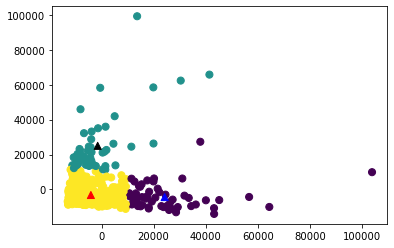

In [200]:
#스케일 안한 데이터 시각화
plt.scatter(customer_frm['pca_x'], customer_frm['pca_y'],
            marker='o',
            c = customer_kmeans.labels_,
           s = 50)
plt.scatter(customer_kmeans_center.cluster_centers_[ : , 0],
            customer_kmeans_center.cluster_centers_[ :, 1],
            marker='^',
            c = ['r', 'k', 'b'],
           s = 50)

plt.show()
plt.close()

In [211]:
#스케일링 진행
std_scaling = feature_scaling(method='standard', input_data=customer_frm_ori)
std_scaling

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [213]:
#스케일링 한 데이터 프레임
customer_frm_scaler = pd.DataFrame(data=std_scaling, columns=customer_frm_ori.keys())
customer_frm_scaler

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [214]:
#스케일링 한 데이터 주성분 분석
customer_kmeans_s = KMeans(n_clusters = 3,
                         verbose    = 1,
                         init       = 'k-means++',  #좀더 상향된 기능으로 센트로이드를 잡는다.
                         max_iter   = 300)          #300회 동안 센터 잡아라.
                     
customer_kmeans_s.fit(customer_frm_scaler)

Initialization complete
Iteration 0, inertia 2620.4347245378653
Iteration 1, inertia 2308.4239256547376
Iteration 2, inertia 2301.049097445435
Iteration 3, inertia 2299.990406294423
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2959.9772189061973
Iteration 1, inertia 2394.8574688010854
Iteration 2, inertia 2337.075967592531
Iteration 3, inertia 2318.74414134242
Iteration 4, inertia 2307.080282503296
Iteration 5, inertia 2296.8157563742398
Iteration 6, inertia 2294.55722072646
Iteration 7, inertia 2294.497928286048
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2700.1714720093682
Iteration 1, inertia 2306.981617435029
Iteration 2, inertia 2302.8701814240344
Iteration 3, inertia 2299.318728535177
Iteration 4, inertia 2296.5646810366807
Iteration 5, inertia 2295.2929621377516
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2949.572263937854
Iteration 1, inert

KMeans(n_clusters=3, verbose=1)

In [218]:
print(customer_kmeans_s.labels_)
print()
print(customer_kmeans_s.cluster_centers_)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 2 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 0 1 1 2 0 1 1 0 2 0 0 1 2 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 2 2 1 1 1 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 2 1 2 1
 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 2 1 1 0 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 2 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]

[[ 1.44865163e+00  1.03304786e-01 -3.03522355e-01  4.00468697e-01
   6.27264086e-01 -3.36203224e-01  6.529

In [215]:
customer_frm_scaler_ori = customer_frm_scaler.copy()
customer_frm_scaler['cid'] = customer_kmeans_s.labels_
customer_frm_scaler

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


In [216]:
#차원 축소 진행
customer_pca2 = PCA(n_components = 2)

customer_pca_trans2 = customer_pca2.fit_transform(customer_frm_scaler_ori)

customer_frm_scaler['pca_x'] = customer_pca_trans2[ : , 0]
customer_frm_scaler['pca_y'] = customer_pca_trans2[ : , 1]
customer_frm_scaler

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid,pca_x,pca_y
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,0.843939,-0.515351
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,1.062676,-0.484601
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,1.269141,0.682055
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,-1.056782,0.610821
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,0.634030,0.974199
...,...,...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,0.222884,2.480505
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,-1.290172,1.560397
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0,3.865149,-0.479854
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,-1.097067,-0.069896


In [217]:
#센터 찍기위한 군집화
customer_kmeans_center2 = KMeans(n_clusters=3)
customer_kmeans_center2.fit(customer_frm_scaler.iloc[ : , -2 : ])
customer_frm_scaler.iloc[ : , -2 : ]

,pca_x,pca_y
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199
...,...,...
435,0.222884,2.480505
436,-1.290172,1.560397
437,3.865149,-0.479854
438,-1.097067,-0.069896


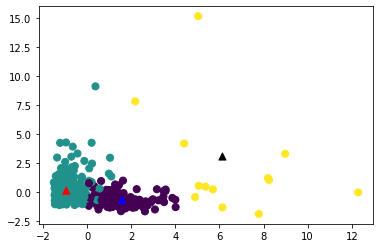

In [219]:
#스케일 안한 데이터 시각화
plt.scatter(customer_frm_scaler['pca_x'], customer_frm_scaler['pca_y'],
            marker='o',
            c = customer_kmeans_s.labels_,
           s = 50)
plt.scatter(customer_kmeans_center2.cluster_centers_[ : , 0],
            customer_kmeans_center2.cluster_centers_[ :, 1],
            marker='^',
            c = ['r', 'k', 'b'],
           s = 50)

plt.show()
plt.close()